In [ ]:
# Import your libraries:
%matplotlib inline

import numpy as np
import pandas as pd

salesDF = pd.read_csv('../data/sales.csv')
salesDF

# Challenge 1 - Explorar el Dataset
# Examinar la vista general de los datos
print("Vista general del dataset:")
print(salesDF.describe())


# Examinar los tipos de datos
print("\nTipos de datos:")
print(salesDF.info())

# Verificar si la primera columna tiene valores únicos
primera_columna = salesDF.iloc[:, 0]
es_unica = primera_columna.is_unique

print("¿La primera columna tiene valores únicos?:", es_unica)
print("\nNúmero total de valores:", len(primera_columna))
print("Número de valores únicos:", primera_columna.nunique())

if es_unica:
    # Si son valores únicos, establecemos como índice
    salesDF = salesDF.set_index(salesDF.columns[0])
    salesDF.index.name = 'index'
else:
    print("¡Advertencia! La primera columna contiene valores duplicados y no puede usarse como índice")


# Challenge 2 - Analizar Correlaciones

import seaborn as sns
import matplotlib.pyplot as plt



# Crear matriz de correlación usando columnas numéricas
correlation_matrix = salesDF.select_dtypes(include=['int64', 'float64']).corr()

# Crear heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Características')
plt.show()

# Challenge 3 - Manejar Valores Faltantes

# Examinar valores faltantes
print("Número de valores faltantes por columna:")
print(salesDF.isnull().sum())

# Calcular porcentaje de valores faltantes
print("\nPorcentaje de valores faltantes por columna:")
print((salesDF.isnull().sum() / len(salesDF)) * 100)

# Eliminar columnas con más del 50% de valores faltantes
missing_percentages = (salesDF.isnull().sum() / len(salesDF)) * 100
columns_to_drop = missing_percentages[missing_percentages > 50].index
sales_cleaned = salesDF.drop(columns=columns_to_drop)

# Eliminar filas con valores faltantes
sales_cleaned = sales_cleaned.dropna()

# Challenge 4 - Preparar Variables Categóricas

# Convertir variables categóricas a dummies
sales_dummy = pd.get_dummies(sales_cleaned, drop_first=True)

# Challenge 5 - Modelado y Predicción 
# (asumiendo que queremos predecir 'nb_customers_on_day')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparar variables
X = sales_dummy.drop('nb_customers_on_day', axis=1)
y = sales_dummy['nb_customers_on_day']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = model.predict(X_test)
print("\nResultados del modelo:")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

'''
# Challenge 6 - Feature Scaling

from sklearn.preprocessing import RobustScaler

# Aplicar scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar nuevo modelo con datos escalados
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Evaluar modelo con scaling
y_pred_scaled = model_scaled.predict(X_test_scaled)
print("\nResultados con Feature Scaling:")
print(f"R2 Score con scaling: {r2_score(y_test, y_pred_scaled)}")
print(f"MSE con scaling: {mean_squared_error(y_test, y_pred_scaled)}")
'''

# Importar las librerías necesarias
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("\n=== Análisis de Importancia de Features con XGBoost y RandomForest ===")

# XGBoost
print("\n--- XGBoost ---")
# Definir parámetros de XGBoost para regresión
params_xgb = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'random_state': 42
}

# Instanciar y entrenar modelo XGBoost
model_xgb = xgb.XGBRegressor(**params_xgb)
model_xgb.fit(X_train, y_train)

# Hacer predicciones
y_pred_xgb = model_xgb.predict(X_test)

# Evaluar modelo
print("\nResultados XGBoost:")
print(f"R2 Score: {r2_score(y_test, y_pred_xgb):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb):.4f}")

# Visualizar importancia de features con XGBoost
plt.figure(figsize=(12, 6))
sorted_idx = model_xgb.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], model_xgb.feature_importances_[sorted_idx])
plt.title('Importancia de Features - XGBoost')
plt.show()

# Random Forest
print("\n--- Random Forest ---")
# Definir parámetros de Random Forest
params_rf = {
    'n_estimators': 100,
    'max_depth': 3,
    'random_state': 42
}

# Instanciar y entrenar modelo Random Forest
model_rf = RandomForestRegressor(**params_rf)
model_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = model_rf.predict(X_test)

# Evaluar modelo
print("\nResultados Random Forest:")
print(f"R2 Score: {r2_score(y_test, y_pred_rf):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.4f}")

# Visualizar importancia de features con Random Forest
plt.figure(figsize=(12, 6))
sorted_idx = model_rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], model_rf.feature_importances_[sorted_idx])
plt.title('Importancia de Features - Random Forest')
plt.show()

# Comparación de modelos
print("\n=== Comparación de Modelos ===")
modelos = {
    'Regresión Lineal': (model, y_pred),
    'XGBoost': (model_xgb, y_pred_xgb),
    'Random Forest': (model_rf, y_pred_rf)
}

for nombre, (modelo, predicciones) in modelos.items():
    print(f"\n{nombre}:")
    print(f"R2 Score: {r2_score(y_test, predicciones):.4f}")
    print(f"MSE: {mean_squared_error(y_test, predicciones):.4f}")

# Visualización comparativa de predicciones
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Regresión Lineal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

plt.subplot(132)
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('XGBoost')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

plt.subplot(133)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Random Forest')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

plt.tight_layout()
plt.show()


Codigo Nuevo

=== Cargando y verificando datos ===

=== Análisis Exploratorio de Datos ===

Estadísticas descriptivas:
            store_ID    day_of_week  nb_customers_on_day           open  \
count  640840.000000  640840.000000        640840.000000  640840.000000   
mean      558.211348       4.000189           633.398577       0.830185   
std       321.878521       1.996478           464.094416       0.375470   
min         1.000000       1.000000             0.000000       0.000000   
25%       280.000000       2.000000           405.000000       1.000000   
50%       558.000000       4.000000           609.000000       1.000000   
75%       837.000000       6.000000           838.000000       1.000000   
max      1115.000000       7.000000          5458.000000       1.000000   

           promotion  school_holiday          sales  
count  640840.000000   640840.000000  640840.000000  
mean        0.381718        0.178472    5777.469011  
std         0.485808        0.382910    3851.338083  
min

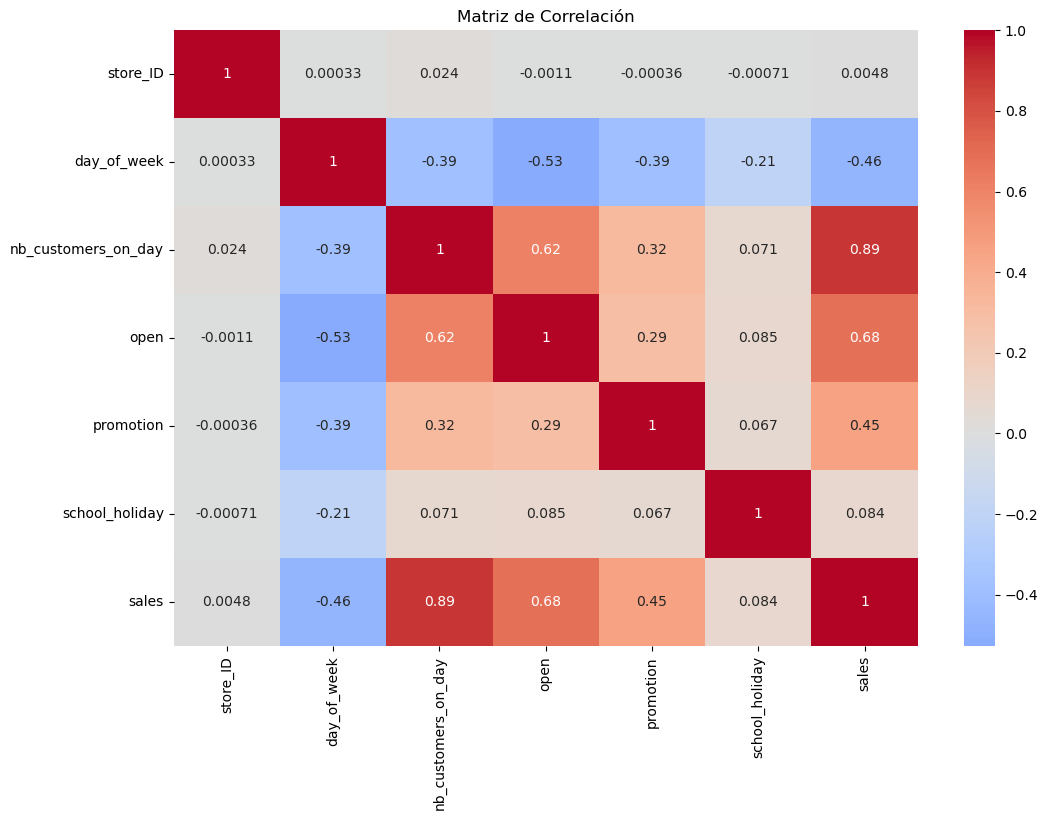


=== Preprocesamiento de Datos ===


TypeError: could not convert string to float: '2013-04-18'

In [1]:
# Importar todas las bibliotecas necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

# Configuración de matplotlib
%matplotlib inline

# 1. Configuración inicial y carga de datos
def cargar_datos():
    """Carga los datos iniciales y realiza verificaciones básicas"""
    print("=== Cargando y verificando datos ===")
    salesDF = pd.read_csv('../data/sales.csv')
    
    # Verificación del índice
    primera_columna = salesDF.iloc[:, 0]
    if primera_columna.is_unique:
        salesDF = salesDF.set_index(salesDF.columns[0])
        salesDF.index.name = 'index'
    else:
        print("¡Advertencia! La primera columna contiene duplicados")
    
    return salesDF

# 2. Análisis exploratorio
def analisis_exploratorio(df):
    """Realiza un análisis exploratorio básico de los datos"""
    print("\n=== Análisis Exploratorio de Datos ===")
    
    # Estadísticas descriptivas
    print("\nEstadísticas descriptivas:")
    print(df.describe())
    
    # Información sobre tipos de datos y valores nulos
    print("\nInformación del dataset:")
    print(df.info())
    
    # Análisis de correlaciones
    correlaciones = df.select_dtypes(include=['int64', 'float64']).corr()
    
    plt.figure(figsize=(12, 8))
    #sns.heatmap(correlaciones, annot=True, cmap='coolwarm', center=0)
    plt.title('Matriz de Correlación')
    plt.show()

# 3. Preprocesamiento de datos
def preprocesar_datos(df):
    """
    Preprocesa los datos para el modelado
    Args:
        df (DataFrame): Dataset original
    Returns:
        DataFrame: Dataset procesado
    """
    print("\n=== Preprocesamiento de Datos ===")
    
    # Eliminar columna de fecha
    if 'date' in df.columns:
        df_limpio = df.drop('date', axis=1)
    
    # Manejo de valores faltantes
    porcentaje_nulos = (df_limpio.isnull().sum() / len(df_limpio)) * 100
    columnas_eliminar = porcentaje_nulos[porcentaje_nulos > 50].index
    df_limpio = df_limpio.drop(columns=columnas_eliminar)
    df_limpio = df_limpio.dropna()
    
    # Eliminar columnas con varianza cero
    varianza_cero = df_limpio.var() == 0
    df_procesado = df_limpio.loc[:, ~varianza_cero]
    
    return df_procesado

# 4. Preparación para modelado
def preparar_modelado(df, variable_objetivo='nb_customers_on_day'):
    """Prepara los datos para el modelado"""
    X = df.drop(variable_objetivo, axis=1)
    y = df[variable_objetivo]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    return X_train, X_test, y_train, y_test

# 5. Entrenamiento y evaluación de modelos
def entrenar_evaluar_modelos(X_train, X_test, y_train, y_test):
    """Entrena y evalúa múltiples modelos"""
    print("\n=== Entrenamiento y Evaluación de Modelos ===")
    
    modelos = {
        'Regresión Lineal': LinearRegression(),
        'XGBoost': xgb.XGBRegressor(
            n_estimators=100, 
            learning_rate=0.1, 
            max_depth=3, 
            random_state=42
        ),
        'Random Forest': RandomForestRegressor(
            n_estimators=100, 
            max_depth=3, 
            random_state=42
        )
    }
    
    resultados = {}
    for nombre, modelo in modelos.items():
        print(f"\nEntrenando {nombre}...")
        modelo.fit(X_train, y_train)
        predicciones = modelo.predict(X_test)
        
        resultados[nombre] = {
            'R2': r2_score(y_test, predicciones),
            'MSE': mean_squared_error(y_test, predicciones),
            'predicciones': predicciones
        }
        
        print(f"R2 Score: {resultados[nombre]['R2']:.4f}")
        print(f"MSE: {resultados[nombre]['MSE']:.4f}")
    
    return resultados

# 6. Visualización de resultados
def visualizar_resultados(y_test, resultados):
    """Visualiza los resultados de los modelos"""
    plt.figure(figsize=(15, 5))
    
    for i, (nombre, res) in enumerate(resultados.items(), 1):
        plt.subplot(1, 3, i)
        plt.scatter(y_test, res['predicciones'], alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], 
                [y_test.min(), y_test.max()], 
                'r--', lw=2)
        plt.title(nombre)
        plt.xlabel('Valores Reales')
        plt.ylabel('Predicciones')
    
    plt.tight_layout()
    plt.show()

# Ejecución principal
def main():
    # 1. Cargar datos
    df = cargar_datos()
    
    # 2. Análisis exploratorio
    analisis_exploratorio(df)
    
    # 3. Preprocesamiento
    df_procesado = preprocesar_datos(df)
    
    # 4. Preparación para modelado
    X_train, X_test, y_train, y_test = preparar_modelado(df_procesado)

    # 5. Entrenamiento y evaluación
    resultados = entrenar_evaluar_modelos(X_train, X_test, y_train, y_test)

    # 6. Visualización
    visualizar_resultados(y_test, resultados)

if __name__ == "__main__":
    main()